# Alignment

This notebook demonstrates a simulated alignment using tike.

In [1]:
import logging
import lzma
import pickle

import matplotlib.pyplot as plt
import numpy as np

import tike.align
import tike.view

In [2]:
for module in [tike, np]:
    print("{} is version {}".format(module.__name__, module.__version__))

tike is version 0.25.1.dev4+gdf3f9c5
numpy is version 1.26.0


## Create test data

Make test data for the alignment problem.

### Define the object

In [3]:
with lzma.open('../../../tests/data/algin_setup.pickle.lzma', 'rb') as file:
    [data, original, flow, shift] = pickle.load(file)

(-0.99961144+0.02402014j) (0.99890274+0.03243559j)


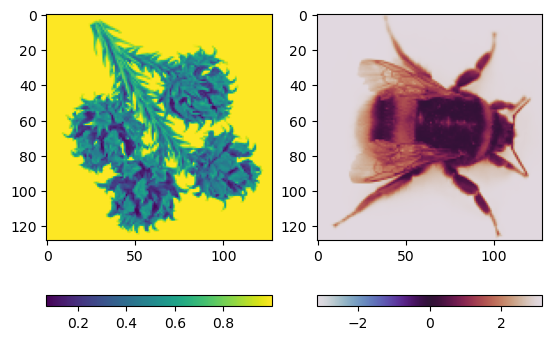

In [4]:
plt.figure()
tike.view.plot_phase(original[0])
plt.show()

### Define the shifts

Each image has a single shift direction in 2 dimensions.

In [5]:
np.random.seed(5)
shift = (np.random.rand(original.shape[0], 2) - 0.5) * 3
shift

array([[-0.83402049,  1.11219692]])

### Simulate the shifted images

In [6]:
data = tike.align.simulate(
    shift=shift,
    original=original,
    flow=None,
    padded_shape=None,
    angle=None
)
data.shape

(1, 128, 128)

(-1.0739715+0.36731178j) (1.0649564+0.027201965j)


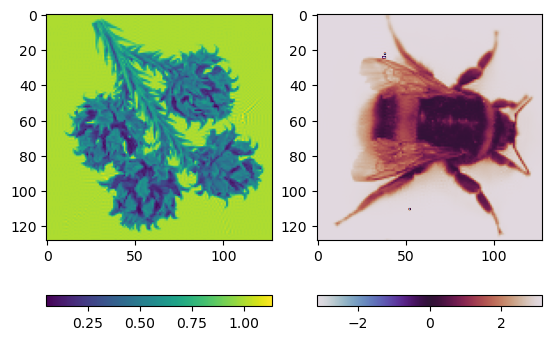

In [7]:
plt.figure()
tike.view.plot_phase(data[data.shape[0] // 2])

## Reconstruct

Now we need to try and reconstruct psi.

In [8]:
# Provide initial guesses for parameters that are updated
result = {
}

In [9]:
logging.basicConfig(level=logging.INFO)

for i in range(1):
    result = tike.align.reconstruct(
        unaligned=data,
        original=original,
        algorithm='cross_correlation',
        **result,
        num_iter=1,
        upsample_factor=100,
    )

INFO:tike.align.align:cross_correlation on 1 - 128 by 128 images for 1 iterations.


In [10]:
result['shift']

array([[-0.83,  1.11]], dtype=float32)

In [11]:
shift

array([[-0.83402049,  1.11219692]])